In [52]:
import pandas as pd
from scipy.stats import ks_2samp
import numpy as np

In [45]:
def person_var_to_var(df_corr,y,cad):

    """
    A função person_var_to_var tem como objetivo encontar as variaveis correlacionadas e eliminar aquelas com menor correlacao com o target.
    ENTRADA:
            df2 = Base para correlacionar
            y = variavel resposta (target)
            cad = variavel para continuar na base
    RETURN
            Retorna uma base com as variáveis nao correlacionadas
    """

    df = df_corr.drop(columns=cad)
    # Convert you str columns to Category columns
    #for x in df.columns:
    #    if x not in cad:
    #        df[x]=df[x].astype("category") 

    df[y]=df[y].astype("int64") 
    # Initialize a CamresV object using you pandas.DataFrame
    pearson_matriz = df.corr(method ='pearson') 
    # will return a pairwise matrix filled with Cramer's V, where columns and index are 
    # the categorical variables of the passed pandas.DataFrame
    corr_cramer = pd.DataFrame(pearson_matriz).rename_axis(f'corr').reset_index().sort_values(by=y,ascending=False)
    orde = pd.DataFrame(corr_cramer[["corr",y]])
    orde["del"] = ''
    orde["stay"] = 1

    for row in range(len(orde)):
        if orde.iloc[row,3] == 1 and orde.iloc[row,3] == 1 != y:
            #print(orde.iloc[row,0] )
            for col in corr_cramer.columns:
                if orde.iloc[row,0] != col and col != 'corr' and col != y and corr_cramer.iloc[row][col] > 0.51 :
                    #print(f'{orde.iloc[row,3]}   :    {col}')
                    for row2 in range(len(orde)):
                        if orde.iloc[row2,0] == col and orde.iloc[row2,3] == 1:
                            #print (orde.iloc[row2,0])
                            orde.iloc[row2,3] = 0
                            orde.iloc[row2,2] = f'{orde.iloc[row,0]} ({round(corr_cramer.iloc[row][col],3)})'

    orde.to_csv(r"C:/Users/renat/Documents/00_MBA/PROJETO_APLICADO/ML-predict-loan-MBA-applied-project/sprint3/CorrelacaoPearson.csv",sep=';',decimal=',',index=False)
    stay = [orde.iloc[row,0] for row in range(len(orde)) if orde.iloc[row,3] == 1]
    
    df_corr = df_corr.loc[:, df_corr.columns.isin(stay+cad)]
    df_corr[y]=df_corr[y].astype("int") 
    return df_corr

cad = [] # variaveis que nao quero que entre no calculo da correlação de cramer. nao inclui o alvo.

In [46]:
df_features =  pd.read_csv('C:\\Users\\renat\\Documents\\00_MBA\PROJETO_APLICADO\\ML-predict-loan-MBA-applied-project\\dados_features\\dados_features.csv', sep=';', decimal='.')
df_features.head(5)

,account_id,disp_id,client_id,account_id_acct,district_id_bank,stmt_frq,date_acct,type_disp,loan_id,date_loan,...,min5,max5,mean5,min6,max6,mean6,response,has_card,idade,days_between
0,10351,12430,12738,10351,23,monthly,1995-05-04,owner,7115,1997-03-04,...,13704.8,800.0,19914.767347,13704.8,800.0,19977.389130,1,0,36,670
1,10351,12431,12739,10351,23,monthly,1995-05-04,disponent,7115,1997-03-04,...,13704.8,800.0,19914.767347,13704.8,800.0,19977.389130,1,0,39,670
2,10436,12532,12840,10436,60,monthly,1996-03-21,owner,7136,1996-09-28,...,18196.0,8296.0,11378.950000,800.0,800.0,800.000000,1,0,57,191
3,4937,5965,5965,4937,12,monthly,1993-02-20,owner,6004,1994-07-23,...,100282.7,96774.9,49023.686598,100282.7,96774.9,49524.962500,1,0,43,518
4,675,810,810,675,58,monthly,1995-08-03,owner,5110,1997-04-01,...,10438.0,900.0,28706.836047,10438.0,900.0,28522.888608,1,1,51,607


In [47]:
df_features.columns

Index(['account_id', 'disp_id', 'client_id', 'account_id_acct',
       'district_id_bank', 'stmt_frq', 'date_acct', 'type_disp', 'loan_id',
       'date_loan', 'amount', 'duration', 'payments', 'status', 'date_birth',
       'district_id_client', 'gender', 'card_id', 'type_card', 'min1', 'max1',
       'mean1', 'min2', 'max2', 'mean2', 'min3', 'max3', 'mean3', 'min4',
       'max4', 'mean4', 'min5', 'max5', 'mean5', 'min6', 'max6', 'mean6',
       'response', 'has_card', 'idade', 'days_between'],
      dtype='object')

In [48]:
cad = ['account_id', 'disp_id', 'client_id', 'account_id_acct',
       'district_id_bank', 'stmt_frq', 'date_acct', 'type_disp', 'loan_id',
       'date_loan', 'status', 'date_birth',
       'district_id_client', 'card_id','type_card']

In [49]:
df_final = person_var_to_var(df_features,y = 'response', cad = cad)
df_final

<ipython-input-45-be9b51f0d8df>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[y]=df_corr[y].astype("int")


,account_id,disp_id,client_id,account_id_acct,district_id_bank,stmt_frq,date_acct,type_disp,loan_id,date_loan,...,date_birth,district_id_client,gender,card_id,type_card,mean1,response,has_card,idade,days_between
0,10351,12430,12738,10351,23,monthly,1995-05-04,owner,7115,1997-03-04,...,1960-10-29,23,1,NaN,NaN,18891.744800,1,0,36,670
1,10351,12431,12739,10351,23,monthly,1995-05-04,disponent,7115,1997-03-04,...,1958-01-17,23,0,NaN,NaN,18891.744800,1,0,39,670
2,10436,12532,12840,10436,60,monthly,1996-03-21,owner,7136,1996-09-28,...,1939-07-27,60,0,NaN,NaN,27385.443750,1,0,57,191
3,4937,5965,5965,4937,12,monthly,1993-02-20,owner,6004,1994-07-23,...,1951-04-10,50,0,NaN,NaN,49212.631818,1,0,43,518
4,675,810,810,675,58,monthly,1995-08-03,owner,5110,1997-04-01,...,1945-09-24,58,1,142.0,classic,29672.605042,1,1,51,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4616,5563,5563,4616,1,monthly,1997-09-24,owner,5930,1998-01-12,...,1976-01-01,1,0,795.0,classic,34405.314286,1,1,22,110
823,6688,8076,8076,6688,16,monthly,1996-06-25,owner,6354,1996-10-23,...,1950-07-27,16,1,NaN,NaN,19563.062500,1,0,46,120
824,9199,11019,11327,9199,72,monthly,1996-05-15,owner,6865,1996-09-11,...,1947-10-21,72,0,NaN,NaN,26861.200000,0,0,48,119
825,1447,1755,1755,1447,65,monthly,1997-02-20,owner,5253,1997-06-03,...,1965-08-18,65,1,NaN,NaN,18234.785714,1,0,31,103


### Selecionar as variáveis por suas correlações não é um bom caminho.  Vamos tentar ver o 'top KS'

In [53]:
# KS 
def ks_score(y_true, y_pred):
    return ks_2samp(y_pred[y_true==1], y_pred[y_true==0]).statistic

In [54]:
df_features.dtypes

account_id              int64
disp_id                 int64
client_id               int64
account_id_acct         int64
district_id_bank        int64
stmt_frq               object
date_acct              object
type_disp              object
loan_id                 int64
date_loan              object
amount                  int64
duration                int64
payments              float64
status                 object
date_birth             object
district_id_client      int64
gender                  int64
card_id               float64
type_card              object
min1                  float64
max1                  float64
mean1                 float64
min2                  float64
max2                  float64
mean2                 float64
min3                  float64
max3                  float64
mean3                 float64
min4                  float64
max4                  float64
mean4                 float64
min5                  float64
max5                  float64
mean5     

In [57]:
df = df_features.select_dtypes(exclude=['object'])

chaves = ['account_id', 'disp_id', 'client_id', 'account_id_acct',
       'district_id_bank', 'loan_id','district_id_client','card_id']

df = df.drop(chaves, axis =1)

df = df.fillna(0)

In [58]:
df

,amount,duration,payments,gender,min1,max1,mean1,min2,max2,mean2,...,min5,max5,mean5,min6,max6,mean6,response,has_card,idade,days_between
0,88704,48,1848.0,1,11853.6,9953.6,18891.744800,12052.4,800.0,19204.563559,...,13704.8,800.0,19914.767347,13704.8,800.0,19977.389130,1,0,36,670
1,88704,48,1848.0,0,11853.6,9953.6,18891.744800,12052.4,800.0,19204.563559,...,13704.8,800.0,19914.767347,13704.8,800.0,19977.389130,1,0,39,670
2,54396,36,1511.0,0,18196.0,8296.0,27385.443750,18196.0,8296.0,23910.691667,...,18196.0,8296.0,11378.950000,800.0,800.0,800.000000,1,0,57,191
3,143904,24,5996.0,0,100282.7,96774.9,49212.631818,100282.7,96774.9,47171.613115,...,100282.7,96774.9,49023.686598,100282.7,96774.9,49524.962500,1,0,43,518
4,102240,60,1704.0,1,10438.0,900.0,29672.605042,10438.0,900.0,29601.857658,...,10438.0,900.0,28706.836047,10438.0,900.0,28522.888608,1,1,51,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,66696,24,2779.0,0,1000.0,58522.1,34405.314286,1000.0,58522.1,29006.040000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,1,1,22,110
823,22968,36,638.0,1,1000.0,9155.0,19563.062500,1000.0,9155.0,14081.520000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,1,0,46,120
824,29448,12,2454.0,0,22890.0,800.0,26861.200000,22890.0,800.0,20435.666667,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0,0,48,119
825,100080,48,2085.0,1,12808.0,300.0,18234.785714,12808.0,300.0,11586.575000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,1,0,31,103


In [59]:
dic = {}
for var in list(df):
    dic[var] = ks_score(df['response'],df[var])

In [60]:
dic_ordenado = {}
#for i in sorted(dic, key= dic.get, reverse=True):
#    print (i, dic[i])
#

for i in sorted(dic, key= dic.get, reverse=True):
    dic_ordenado[i] = (i, dic[i])

dic_ordenado

{'response': ('response', 1.0),
 'min1': ('min1', 0.35493026841404446),
 'min4': ('min4', 0.3104457214941482),
 'min2': ('min2', 0.29509776438432966),
 'min6': ('min6', 0.28122152918915133),
 'min3': ('min3', 0.2719882262246829),
 'min5': ('min5', 0.26783586796551967),
 'payments': ('payments', 0.2445861658140024),
 'amount': ('amount', 0.2330576774826547),
 'mean1': ('mean1', 0.19163921788492536),
 'max1': ('max1', 0.16358889901184387),
 'mean2': ('mean2', 0.15866563879739295),
 'mean6': ('mean6', 0.15419791155652113),
 'has_card': ('has_card', 0.15391758357278015),
 'max2': ('max2', 0.13977854089284464),
 'mean5': ('mean5', 0.13460999369262036),
 'mean3': ('mean3', 0.13289298479220688),
 'mean4': ('mean4', 0.12131193496390777),
 'max6': ('max6', 0.12120681197000491),
 'days_between': ('days_between', 0.11840353213259514),
 'max3': ('max3', 0.09818487630527717),
 'max5': ('max5', 0.09191253766907281),
 'max4': ('max4', 0.0733583292452169),
 'duration': ('duration', 0.06032307800126148

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df_numeric= df[['min1',
'min4',
'min2',
'min6',
'min3',
'min5', 'response']]

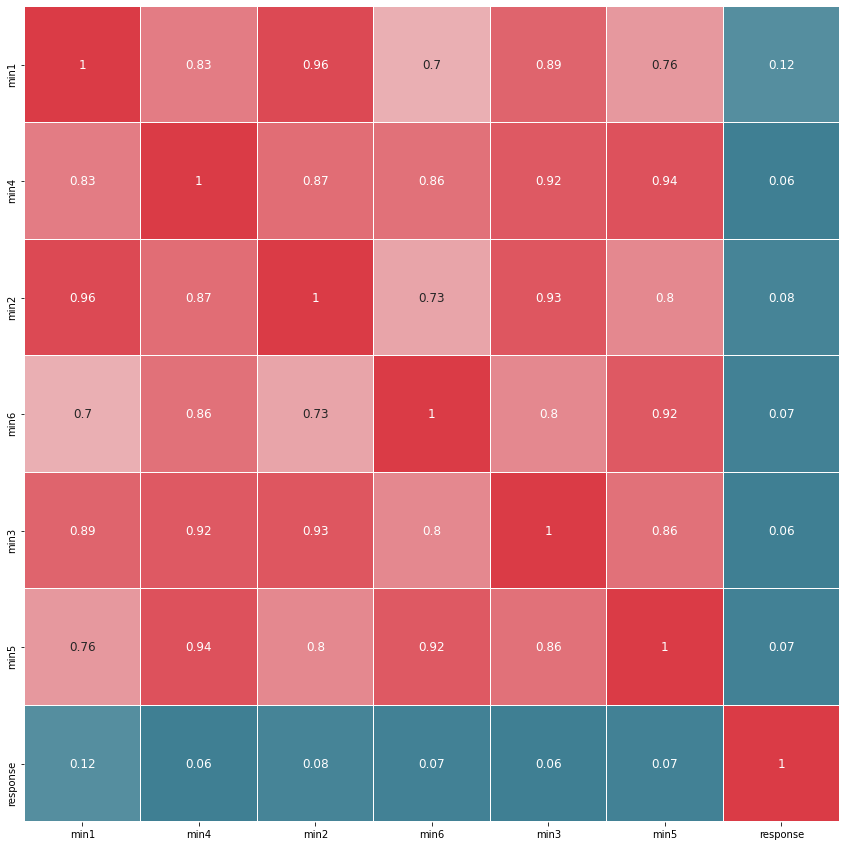

In [68]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(
        df_numeric.corr().round(2), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar=False,
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.show()

#### Vou excluir 'min4','min2','min6','min3','min5' da base e deixar apenas min1

In [69]:
df_modelagem = df_features.drop(['min4','min2','min6','min3','min5'], axis=1)

In [70]:
df = df_modelagem.select_dtypes(exclude=['object'])
chaves = ['account_id', 'disp_id', 'client_id', 'account_id_acct',
       'district_id_bank', 'loan_id','district_id_client','card_id']
df = df.drop(chaves, axis =1)
df = df.fillna(0)

In [71]:
dic = {}
for var in list(df):
    dic[var] = ks_score(df['response'],df[var])

dic_ordenado = {}
#for i in sorted(dic, key= dic.get, reverse=True):
#    print (i, dic[i])
#

for i in sorted(dic, key= dic.get, reverse=True):
    dic_ordenado[i] = (i, dic[i])

dic_ordenado

{'response': ('response', 1.0),
 'min1': ('min1', 0.35493026841404446),
 'payments': ('payments', 0.2445861658140024),
 'amount': ('amount', 0.2330576774826547),
 'mean1': ('mean1', 0.19163921788492536),
 'max1': ('max1', 0.16358889901184387),
 'mean2': ('mean2', 0.15866563879739295),
 'mean6': ('mean6', 0.15419791155652113),
 'has_card': ('has_card', 0.15391758357278015),
 'max2': ('max2', 0.13977854089284464),
 'mean5': ('mean5', 0.13460999369262036),
 'mean3': ('mean3', 0.13289298479220688),
 'mean4': ('mean4', 0.12131193496390777),
 'max6': ('max6', 0.12120681197000491),
 'days_between': ('days_between', 0.11840353213259514),
 'max3': ('max3', 0.09818487630527717),
 'max5': ('max5', 0.09191253766907281),
 'max4': ('max4', 0.0733583292452169),
 'duration': ('duration', 0.06032307800126148),
 'idade': ('idade', 0.05042399607540823),
 'gender': ('gender', 0.038807905249141496)}

### Variáveis Ideais

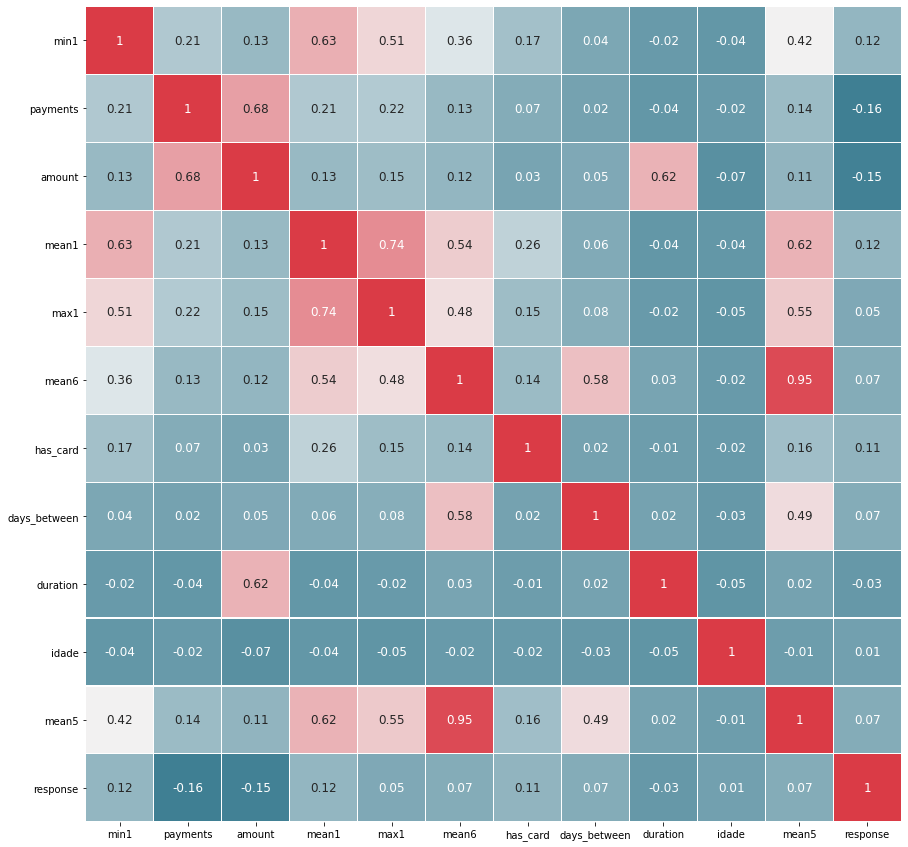

In [86]:
df_numeric= df[['min1',
'payments',
'amount',
'mean1',
'max1',
'mean6', 'has_card', 'days_between', 'duration', 'idade', 'response']]

fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(
        df_numeric.corr().round(2), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar=False,
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.show()

### retirando o 'mean2' base de modelagem por mostra-se irrelevante e pode atrapalhar na multicolinearidade e retirar 'gender' para evitar que o modelo não seja sexista futuramente, caso a base em produção seja desbalanceada, pois no cenário atual, existem a mesma qua taxa de contratos bem sucedidos para ambos os generos. 

In [83]:
df_modelagem[['gender', 'response']].groupby('gender').mean('response')

,response
gender,
0,0.914634
1,0.901679


In [84]:
df_modelagem = df_modelagem.drop(['mean2', 'gender'], axis=1)

### Variáveis que causam mais multicolinaeridade nas demais e entre elas mesmas:

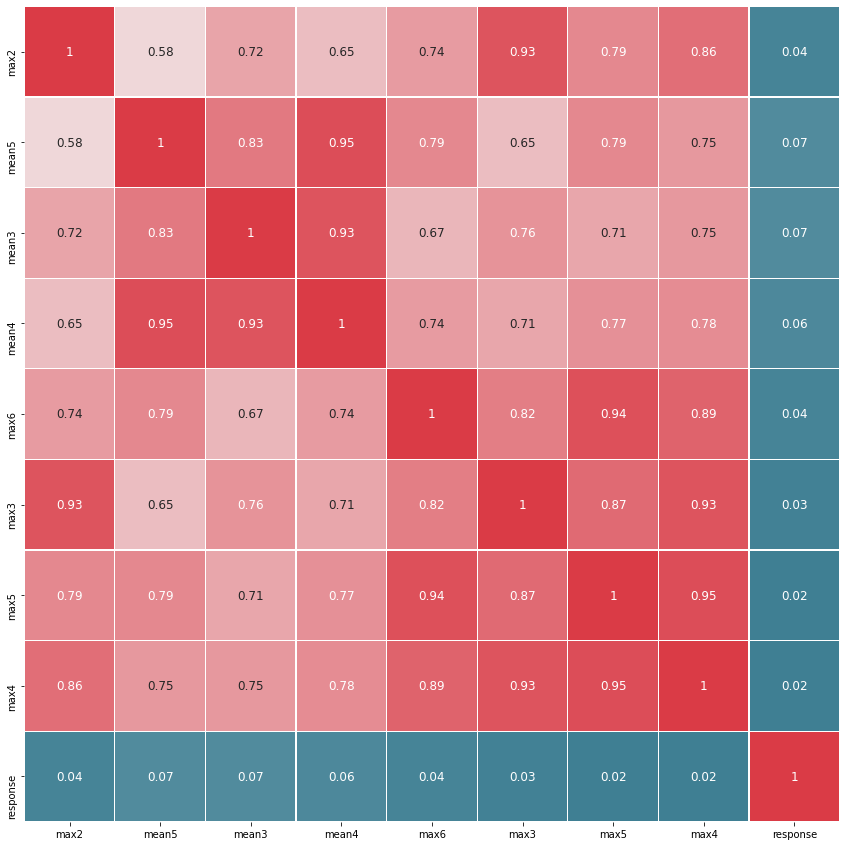

In [85]:
df_numeric= df[['max2',
'mean5',
'mean3',
'mean4',
'max6',
'max3',
'max5',
'max4', 'response']]

fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(
        df_numeric.corr().round(2), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar=False,
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.show()

#### Pelo KS que elas apresentam, não vale o trabalho de "tentar salvá-las".

In [90]:
df_modelagem = df_modelagem.drop(['max2',
'mean5',
'mean3',
'mean4',
'max6',
'max3',
'max5',
'max4'], axis=1)

### Ao final, a base para modelagem terá as seguintes variáves descorrelacionadas:

In [91]:
df_modelagem.columns

Index(['account_id', 'disp_id', 'client_id', 'account_id_acct',
       'district_id_bank', 'stmt_frq', 'date_acct', 'type_disp', 'loan_id',
       'date_loan', 'amount', 'duration', 'payments', 'status', 'date_birth',
       'district_id_client', 'card_id', 'type_card', 'min1', 'max1', 'mean1',
       'mean6', 'response', 'has_card', 'idade', 'days_between'],
      dtype='object')

In [92]:
df_modelagem.head()

,account_id,disp_id,client_id,account_id_acct,district_id_bank,stmt_frq,date_acct,type_disp,loan_id,date_loan,...,card_id,type_card,min1,max1,mean1,mean6,response,has_card,idade,days_between
0,10351,12430,12738,10351,23,monthly,1995-05-04,owner,7115,1997-03-04,...,NaN,NaN,11853.6,9953.6,18891.744800,19977.389130,1,0,36,670
1,10351,12431,12739,10351,23,monthly,1995-05-04,disponent,7115,1997-03-04,...,NaN,NaN,11853.6,9953.6,18891.744800,19977.389130,1,0,39,670
2,10436,12532,12840,10436,60,monthly,1996-03-21,owner,7136,1996-09-28,...,NaN,NaN,18196.0,8296.0,27385.443750,800.000000,1,0,57,191
3,4937,5965,5965,4937,12,monthly,1993-02-20,owner,6004,1994-07-23,...,NaN,NaN,100282.7,96774.9,49212.631818,49524.962500,1,0,43,518
4,675,810,810,675,58,monthly,1995-08-03,owner,5110,1997-04-01,...,142.0,classic,10438.0,900.0,29672.605042,28522.888608,1,1,51,607


### Observando a quantidade de missings para tratar posteriormente

In [95]:
df_modelagem.isna().sum()

account_id              0
disp_id                 0
client_id               0
account_id_acct         0
district_id_bank        0
stmt_frq                0
date_acct               0
type_disp               0
loan_id                 0
date_loan               0
amount                  0
duration                0
payments                0
status                  0
date_birth              0
district_id_client      0
card_id               657
type_card             657
min1                    0
max1                    0
mean1                   0
mean6                  98
response                0
has_card                0
idade                   0
days_between            0
dtype: int64

In [97]:
df_modelagem.to_csv('C:\\Users\\renat\\Documents\\00_MBA\\PROJETO_APLICADO\\ML-predict-loan-MBA-applied-project\\dados_modelagem\\df_model.csv', sep=',', decimal='.', index=False)